In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dota_df = pd.read_csv('dota.csv')

In [3]:
dota_df.head()

,match_id,duration,radiant_win,radiant_denies,radiant_runes,radiant_cosmetics,radiant_camps_stacked,radiant_last_hits,radiant_consumables,radiant_ability_used,...,avg_gold_adv_early,avg_xp_adv_early,radiant_kill_courier,dire_kill_courier,radiant_kill_rs,dire_kill_rs,radiant_aegis,dire_aegis,radiant_chat,dire_chat
0,7115636736,2347,False,55,14,18,9,759,33,597,...,246.5,289.6,1,1,0,1,0,1,28,19
1,7099875329,1383,False,5,1,5,2,304,16,402,...,-4111.9,-1667.3,0,3,0,1,0,1,23,21
2,7237632006,2117,False,48,24,6,12,865,32,1019,...,-345.7,-463.3,1,2,0,2,0,1,66,35
3,7230619656,1865,True,35,18,4,8,709,26,594,...,-647.1,-213.7,1,2,0,0,0,0,18,3
4,7221346319,1656,False,42,9,3,5,591,21,533,...,55.3,190.5,2,1,0,0,0,0,13,9


# Exploratory Data Analysis

In [4]:
dota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               10520 non-null  int64  
 1   duration               10520 non-null  int64  
 2   radiant_win            10520 non-null  bool   
 3   radiant_denies         10520 non-null  int64  
 4   radiant_runes          10520 non-null  int64  
 5   radiant_cosmetics      10520 non-null  int64  
 6   radiant_camps_stacked  10520 non-null  int64  
 7   radiant_last_hits      10520 non-null  int64  
 8   radiant_consumables    10520 non-null  int64  
 9   radiant_ability_used   10520 non-null  int64  
 10  radiant_obs            10520 non-null  int64  
 11  radiant_portal_used    10520 non-null  int64  
 12  radiant_fruit_plucked  10520 non-null  int64  
 13  radiant_lamp_used      10520 non-null  int64  
 14  radiant_sent           10520 non-null  int64  
 15  di

In [5]:
dota_df.describe()

,match_id,duration,radiant_denies,radiant_runes,radiant_cosmetics,radiant_camps_stacked,radiant_last_hits,radiant_consumables,radiant_ability_used,radiant_obs,...,avg_gold_adv_early,avg_xp_adv_early,radiant_kill_courier,dire_kill_courier,radiant_kill_rs,dire_kill_rs,radiant_aegis,dire_aegis,radiant_chat,dire_chat
count,1.052000e+04,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,...,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000
mean,7.138561e+09,2085.350190,35.460361,21.774620,11.149810,6.876521,865.986502,31.747433,816.123574,15.879278,...,-11.655135,26.833518,1.570817,1.435361,0.731084,0.679278,0.715589,0.665399,31.332605,31.136407
std,6.021923e+07,589.269695,13.621405,8.763579,7.369435,4.836195,354.762419,11.420440,672.277818,4.684785,...,1185.546493,861.783686,1.468277,1.427929,0.893738,0.857012,0.883511,0.847885,34.045058,33.207273
min,7.032774e+09,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5373.000000,-4304.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.085469e+09,1687.750000,26.000000,16.000000,5.000000,3.000000,636.000000,24.000000,513.000000,13.000000,...,-783.750000,-526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,10.000000
50%,7.138379e+09,1996.000000,34.000000,21.000000,12.000000,6.000000,814.000000,30.000000,681.000000,15.000000,...,0.000000,14.900000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000
75%,7.193131e+09,2393.000000,43.000000,27.000000,17.000000,9.000000,1039.000000,38.000000,918.000000,18.000000,...,759.583333,585.225000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,41.000000,41.000000
max,7.238633e+09,8199.000000,115.000000,116.000000,36.000000,34.000000,4372.000000,106.000000,14785.000000,62.000000,...,4960.300000,3627.400000,13.000000,23.000000,7.000000,5.000000,7.000000,5.000000,403.000000,454.000000


In [6]:
dota_df.radiant_win.value_counts()

radiant_win
False    5318
True     5202
Name: count, dtype: int64

Relatively even dataset

## Dealing with multi-collinearity 

Some models cannot deal with multi collinearity. For example, logistic regression, KNN and Naive Bayes

In [7]:
dota_df.corr()

,match_id,duration,radiant_win,radiant_denies,radiant_runes,radiant_cosmetics,radiant_camps_stacked,radiant_last_hits,radiant_consumables,radiant_ability_used,...,avg_gold_adv_early,avg_xp_adv_early,radiant_kill_courier,dire_kill_courier,radiant_kill_rs,dire_kill_rs,radiant_aegis,dire_aegis,radiant_chat,dire_chat
match_id,1.000000,-0.025342,0.036632,-0.021578,0.198611,-0.023941,0.175275,0.089590,-0.060948,0.045658,...,0.024047,0.034350,0.015172,-0.029319,-0.071858,-0.048601,-0.066041,-0.041552,-0.007965,0.003609
duration,-0.025342,1.000000,0.015430,0.159637,0.644626,0.201316,0.272699,0.862144,0.469446,0.439524,...,0.008962,0.008379,0.227651,0.234602,0.506095,0.500413,0.497376,0.490179,0.193067,0.175100
radiant_win,0.036632,0.015430,1.000000,0.151160,0.343999,0.015163,0.084462,0.114694,0.115889,0.053266,...,0.331136,0.336325,0.064826,-0.070538,0.435035,-0.420776,0.440200,-0.424813,-0.092295,0.114379
radiant_denies,-0.021578,0.159637,0.151160,1.000000,0.240149,0.132626,0.099331,0.258643,0.209294,0.134758,...,0.385412,0.445575,0.071411,0.053283,0.211079,0.047439,0.209210,0.043621,-0.017279,0.051235
radiant_runes,0.198611,0.644626,0.343999,0.240149,1.000000,0.191003,0.295431,0.724311,0.402005,0.337367,...,0.302912,0.280298,0.255751,0.089060,0.554233,0.143610,0.552745,0.138286,0.073244,0.178561
radiant_cosmetics,-0.023941,0.201316,0.015163,0.132626,0.191003,1.000000,0.216541,0.273722,0.311819,0.184519,...,0.010461,0.000568,0.123568,0.107586,0.230635,0.217137,0.227865,0.213235,0.059831,0.076094
radiant_camps_stacked,0.175275,0.272699,0.084462,0.099331,0.295431,0.216541,1.000000,0.412646,0.217054,0.156359,...,0.079608,0.077843,0.096226,0.060386,0.213756,0.177334,0.214047,0.173910,0.026059,0.073594
radiant_last_hits,0.089590,0.862144,0.114694,0.258643,0.724311,0.273722,0.412646,1.000000,0.477127,0.436127,...,0.112502,0.122568,0.254800,0.214660,0.515758,0.454897,0.509920,0.444630,0.143523,0.175202
radiant_consumables,-0.060948,0.469446,0.115889,0.209294,0.402005,0.311819,0.217054,0.477127,1.000000,0.275547,...,0.112328,0.111292,0.167205,0.197458,0.416756,0.273625,0.410489,0.267922,0.179590,0.246768
radiant_ability_used,0.045658,0.439524,0.053266,0.134758,0.337367,0.184519,0.156359,0.436127,0.275547,1.000000,...,0.024195,0.040633,0.129317,0.110329,0.277791,0.227697,0.274957,0.223343,0.096496,0.166914


### Remove match_id and Duration
match_id:
Match id shouldnt be used in the analysis

Duration:
Duration doesn't seem to be that useful. Highly correlated with some things such as last hits, sentries, runes

In [8]:
dota_df_subset = dota_df[[
 'radiant_win',
 'radiant_denies',
 'radiant_runes',
 'radiant_cosmetics',
 'radiant_camps_stacked',
 'radiant_last_hits',
 'radiant_consumables',
 'radiant_ability_used',
 'radiant_obs',
 'radiant_portal_used',
 'radiant_fruit_plucked',
 'radiant_lamp_used',
 'radiant_sent',
 'dire_denies',
 'dire_runes',
 'dire_cosmetics',
 'dire_camps_stacked',
 'dire_last_hits',
 'dire_consumables',
 'dire_ability_used',
 'dire_obs',
 'dire_sent',
 'dire_portal_used',
 'dire_fruit_plucked',
 'dire_lamp_used',
 'avg_gold_adv_early',
 'avg_xp_adv_early',
 'radiant_kill_courier',
 'dire_kill_courier',
 'radiant_kill_rs',
 'dire_kill_rs',
 'radiant_aegis',
 'dire_aegis',
 'radiant_chat',
 'dire_chat']]

In [9]:
dota_df_subset.corr()

,radiant_win,radiant_denies,radiant_runes,radiant_cosmetics,radiant_camps_stacked,radiant_last_hits,radiant_consumables,radiant_ability_used,radiant_obs,radiant_portal_used,...,avg_gold_adv_early,avg_xp_adv_early,radiant_kill_courier,dire_kill_courier,radiant_kill_rs,dire_kill_rs,radiant_aegis,dire_aegis,radiant_chat,dire_chat
radiant_win,1.000000,0.151160,0.343999,0.015163,0.084462,0.114694,0.115889,0.053266,0.037379,0.117929,...,0.331136,0.336325,0.064826,-0.070538,0.435035,-0.420776,0.440200,-0.424813,-0.092295,0.114379
radiant_denies,0.151160,1.000000,0.240149,0.132626,0.099331,0.258643,0.209294,0.134758,0.233004,0.083602,...,0.385412,0.445575,0.071411,0.053283,0.211079,0.047439,0.209210,0.043621,-0.017279,0.051235
radiant_runes,0.343999,0.240149,1.000000,0.191003,0.295431,0.724311,0.402005,0.337367,0.674802,0.368703,...,0.302912,0.280298,0.255751,0.089060,0.554233,0.143610,0.552745,0.138286,0.073244,0.178561
radiant_cosmetics,0.015163,0.132626,0.191003,1.000000,0.216541,0.273722,0.311819,0.184519,0.253511,0.181092,...,0.010461,0.000568,0.123568,0.107586,0.230635,0.217137,0.227865,0.213235,0.059831,0.076094
radiant_camps_stacked,0.084462,0.099331,0.295431,0.216541,1.000000,0.412646,0.217054,0.156359,0.315059,0.198463,...,0.079608,0.077843,0.096226,0.060386,0.213756,0.177334,0.214047,0.173910,0.026059,0.073594
radiant_last_hits,0.114694,0.258643,0.724311,0.273722,0.412646,1.000000,0.477127,0.436127,0.882777,0.299195,...,0.112502,0.122568,0.254800,0.214660,0.515758,0.454897,0.509920,0.444630,0.143523,0.175202
radiant_consumables,0.115889,0.209294,0.402005,0.311819,0.217054,0.477127,1.000000,0.275547,0.554773,0.207302,...,0.112328,0.111292,0.167205,0.197458,0.416756,0.273625,0.410489,0.267922,0.179590,0.246768
radiant_ability_used,0.053266,0.134758,0.337367,0.184519,0.156359,0.436127,0.275547,1.000000,0.450490,0.156890,...,0.024195,0.040633,0.129317,0.110329,0.277791,0.227697,0.274957,0.223343,0.096496,0.166914
radiant_obs,0.037379,0.233004,0.674802,0.253511,0.315059,0.882777,0.554773,0.450490,1.000000,0.259937,...,0.015684,0.022161,0.248936,0.255217,0.524093,0.503107,0.515536,0.493143,0.206581,0.199095
radiant_portal_used,0.117929,0.083602,0.368703,0.181092,0.198463,0.299195,0.207302,0.156890,0.259937,1.000000,...,0.100347,0.106473,0.097956,0.062914,0.273520,0.072933,0.276092,0.071357,0.043254,0.091773


Something that is intuitive is that the correlation coefficient for radient winning is positive for radiant mini objectives such as last hits, roshan kills, aegis and negative for objectives for dires objectives. However, something that was interesting is that the correlation coefficient for radiant_win is negative with that of radiant_chat, and positive with dire_chat. This seems to suggest talking more on the chat seem to negatively reduce the chances of winning. 

<Axes: >

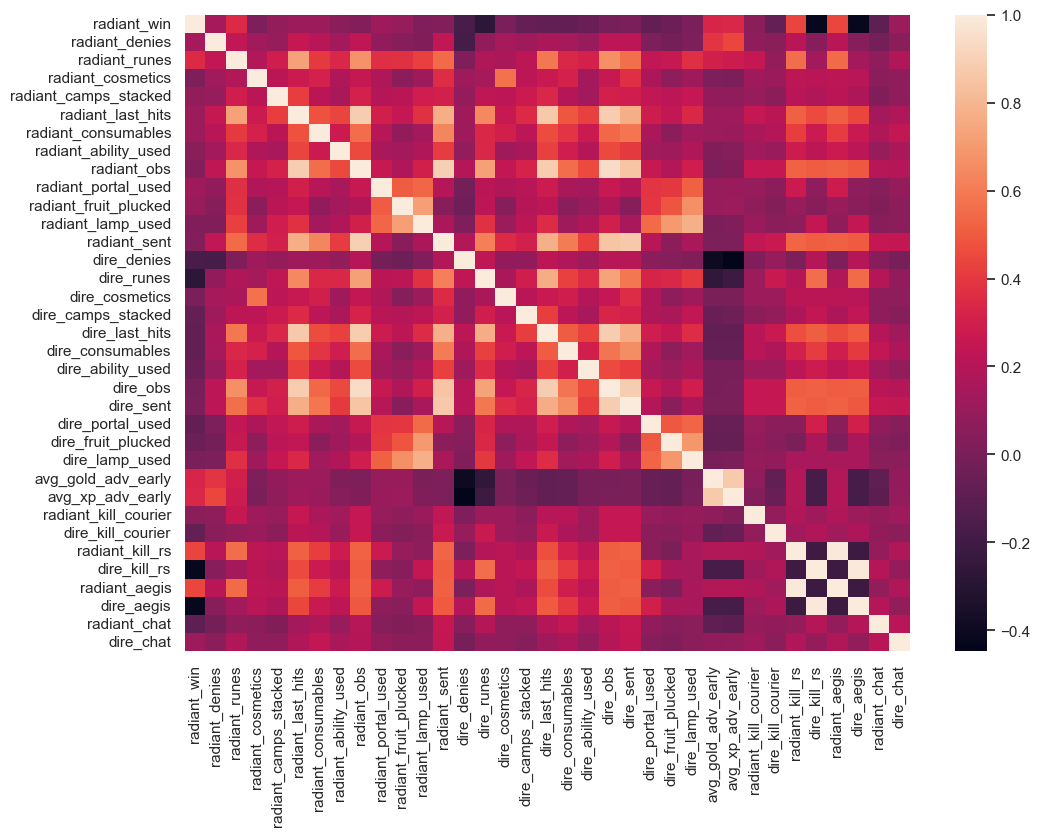

In [10]:
sns.set(font_scale=0.7)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(dota_df_subset.corr())

Some multicollinearity issues. 
For example, radiant obs is correlated with obs, last hits, sentry, lamp_used, runes for both teams as well. This is because as the duration increases, there will be more time for both teams to get last hits and buy observer wards. One possibility to deal with this is by using the difference in these mini objectives instead of the absolute number. 

Killing of roshan and taking of aegis is also very correlated. One variable should be used instead. 

The gold and exp advantage are also highly correlated. This can be combined to form a single varaible for early advantage.

This presents some multicllinearity issues.  


In [11]:
dota_df_subset['last_hit_difference'] = dota_df_subset['radiant_last_hits'] - dota_df_subset['dire_last_hits']
dota_df_subset['obs_difference'] = dota_df_subset['radiant_obs'] - dota_df_subset['dire_obs']
dota_df_subset['sent_difference'] = dota_df_subset['radiant_sent'] - dota_df_subset['dire_sent']
dota_df_subset['rune_difference'] = dota_df_subset['radiant_runes'] - dota_df_subset['dire_runes']
dota_df_subset['lamp_difference'] = dota_df_subset['radiant_lamp_used'] - dota_df_subset['dire_lamp_used']


C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_8756\1268583923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset['last_hit_difference'] = dota_df_subset['radiant_last_hits'] - dota_df_subset['dire_last_hits']


In [12]:
dota_df_subset_cleaned= dota_df_subset[[
    'radiant_win',
    'radiant_denies',
    'radiant_cosmetics',
    'radiant_camps_stacked',
    'radiant_consumables',
    'radiant_ability_used',
    'radiant_portal_used',
    'radiant_fruit_plucked',
    'dire_denies',
    'dire_cosmetics',
    'dire_camps_stacked',
    'dire_consumables',
    'dire_ability_used',
    'dire_portal_used',
    'dire_fruit_plucked',
    'avg_gold_adv_early',
    'avg_xp_adv_early',
    'radiant_kill_courier',
    'dire_kill_courier',
    'radiant_aegis',
    'dire_aegis',
    'radiant_chat',
    'last_hit_difference',
    'obs_difference',
    'sent_difference',
    'rune_difference',
    'lamp_difference',
    'dire_chat']]

In [13]:
dota_df_subset_cleaned

,radiant_win,radiant_denies,radiant_cosmetics,radiant_camps_stacked,radiant_consumables,radiant_ability_used,radiant_portal_used,radiant_fruit_plucked,dire_denies,dire_cosmetics,...,dire_kill_courier,radiant_aegis,dire_aegis,radiant_chat,last_hit_difference,obs_difference,sent_difference,rune_difference,lamp_difference,dire_chat
0,False,55,18,9,33,597,0,0,30,17,...,1,0,1,28,-236,0,1,-21,0,19
1,False,5,5,2,16,402,0,0,40,21,...,3,0,1,23,-135,1,3,-28,0,21
2,False,48,6,12,32,1019,3,2,31,11,...,2,0,1,66,-254,-2,-2,-5,11,35
3,True,35,4,8,26,594,0,7,24,2,...,2,0,0,18,-74,-1,-1,-10,4,3
4,False,42,3,5,21,533,0,7,32,6,...,1,0,0,13,-48,-1,-10,-18,-2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10515,False,22,2,4,46,774,0,0,31,0,...,4,1,1,65,-183,1,3,-6,0,32
10516,True,59,10,16,29,521,2,8,27,13,...,0,2,0,32,101,-2,-3,-2,-11,34
10517,True,44,10,7,35,529,0,0,29,10,...,0,1,0,47,100,-1,1,1,0,18
10518,True,26,15,2,20,541,0,0,54,24,...,0,1,0,26,-233,0,2,-11,0,9


<Axes: >

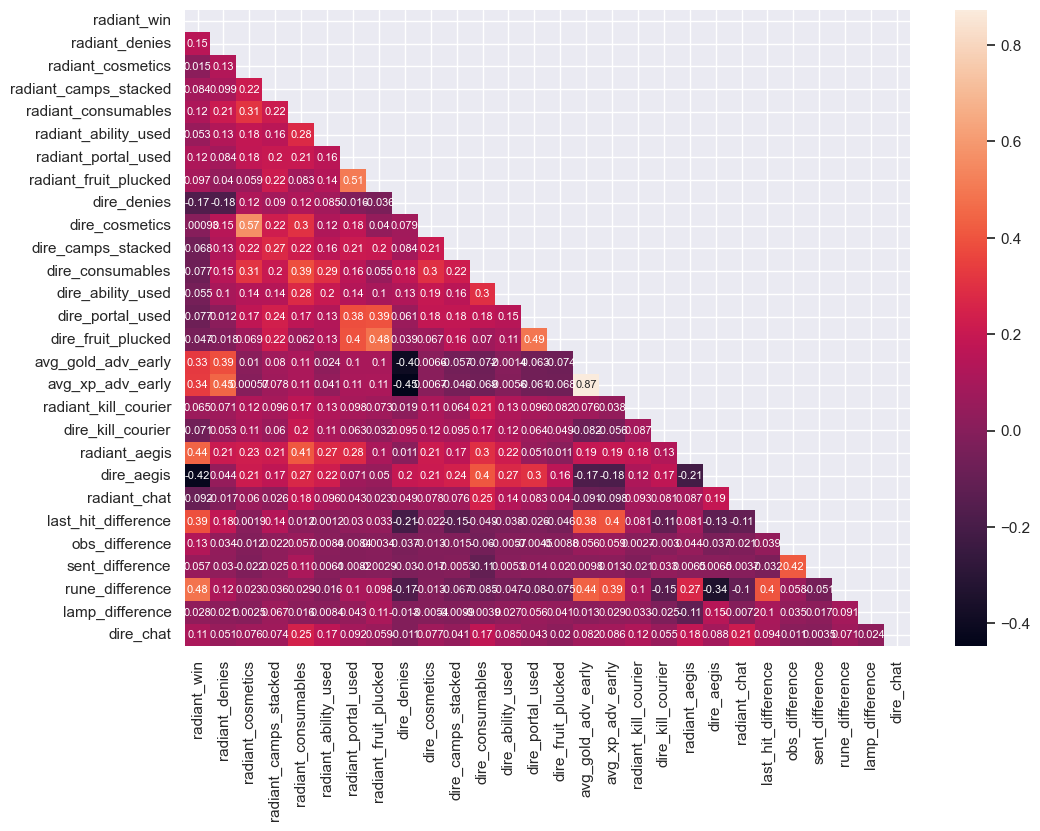

In [14]:
mask = np.triu(np.ones_like(dota_df_subset_cleaned.corr(), dtype=bool))
sns.heatmap(dota_df_subset_cleaned.corr(), annot= True, mask=mask, annot_kws={"size": 8})

After some cleaning, avg_gold_adv_early and avg_xp_adv_early are still highly correlated. One way of dealing with them can be to try centering them

### Try centering exp advantage

In [15]:
mean_gold = dota_df_subset_cleaned['avg_gold_adv_early'].mean()
mean_xp = dota_df_subset_cleaned['avg_xp_adv_early'].mean()

In [16]:
dota_df_subset_cleaned['avg_gold_adv_early_centered'] = dota_df_subset_cleaned['avg_gold_adv_early'] - mean_gold
dota_df_subset_cleaned['avg_xp_adv_early_centered'] = dota_df_subset_cleaned['avg_xp_adv_early'] - mean_gold

C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_8756\1053707583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned['avg_gold_adv_early_centered'] = dota_df_subset_cleaned['avg_gold_adv_early'] - mean_gold
C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_8756\1053707583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned['avg_xp_adv_early_centered'] = dota_df_subset_cleaned['avg_xp_adv_early'] - mean_gold


<Axes: >

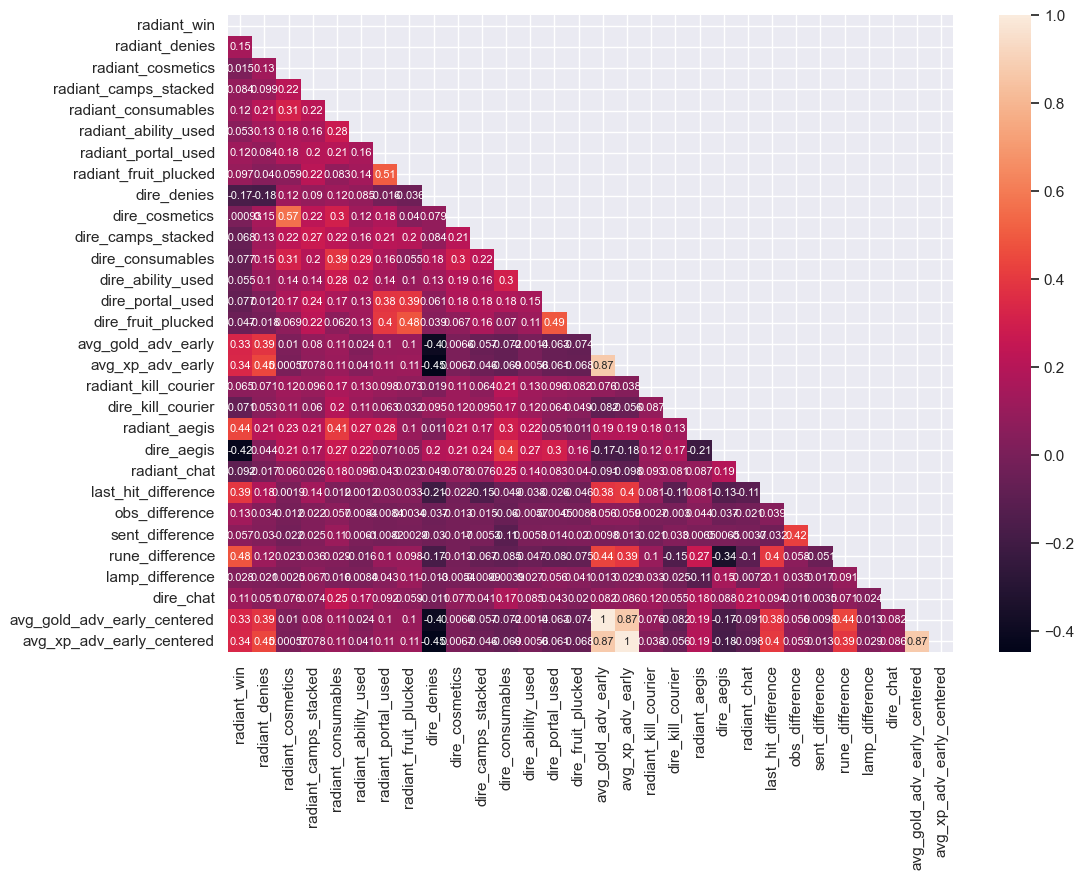

In [17]:
mask = np.triu(np.ones_like(dota_df_subset_cleaned.corr(), dtype=bool))
sns.heatmap(dota_df_subset_cleaned.corr(), annot= True, mask=mask, annot_kws={"size": 8})

Unfortunately in this case, centering doesnt help in this case to reduce multicollinearity.

Drop the centered columns

In [18]:
dota_df_subset_cleaned.drop('avg_gold_adv_early_centered', axis='columns', inplace=True)
dota_df_subset_cleaned.drop('avg_xp_adv_early_centered', axis='columns', inplace = True)

C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_8756\3185270526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned.drop('avg_gold_adv_early_centered', axis='columns', inplace=True)
C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_8756\3185270526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned.drop('avg_xp_adv_early_centered', axis='columns', inplace = True)


To deal with the multicollinearity, a new variable **avg_adv** is created. It combines **avg_gold_adv_early** and **avg_xp_adv_early**. The two variables are then dropped.

In [19]:
dota_df_subset_cleaned['avg_adv'] = dota_df_subset_cleaned['avg_gold_adv_early'] + dota_df_subset_cleaned['avg_xp_adv_early']
dota_df_subset_cleaned.drop('avg_gold_adv_early', axis='columns', inplace=True)
dota_df_subset_cleaned.drop('avg_xp_adv_early', axis='columns', inplace = True)

C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_8756\388202558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned['avg_adv'] = dota_df_subset_cleaned['avg_gold_adv_early'] + dota_df_subset_cleaned['avg_xp_adv_early']
C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_8756\388202558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned.drop('avg_gold_adv_early', axis='columns', inplace=True)
C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_8756\388202558.py:3: SettingWithCopyWarning: 
A value is trying to 

<Axes: >

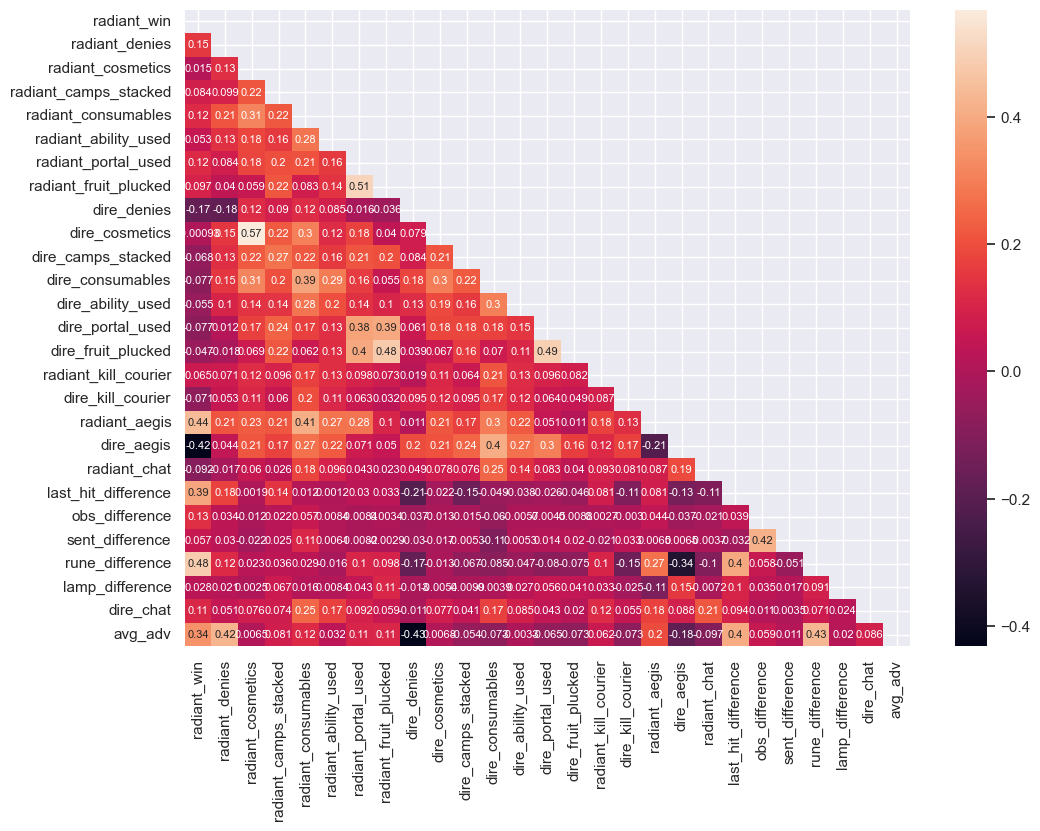

In [20]:
mask = np.triu(np.ones_like(dota_df_subset_cleaned.corr(), dtype=bool))
sns.heatmap(dota_df_subset_cleaned.corr(), annot= True, mask=mask, annot_kws={"size": 8})

## Variance Inflaction Factor
Variables are no longer highly correlated. Check again using variance inflation factor VIF <br>

$$VIF_i = \frac{1}{1-R^{2}_{i}}$$
**where:**<br>
$R^{2}_{i} = $ Unadjusted coefficient of determination for regressing the ith independent variable on the remaining ones<br>

In general terms,

VIF equal to 1 = variables are not correlated<br>
VIF between 1 and 5 = variables are moderately correlated<br> 
VIF greater than 5 = variables are highly correlated

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = dota_df_subset_cleaned[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [22]:
considered_features = ['radiant_denies', 'radiant_cosmetics',
       'radiant_camps_stacked', 'radiant_consumables', 'radiant_ability_used',
       'radiant_portal_used', 'radiant_fruit_plucked', 'dire_denies',
       'dire_cosmetics', 'dire_camps_stacked', 'dire_consumables',
       'dire_ability_used', 'dire_portal_used', 'dire_fruit_plucked',
       'avg_adv', 'radiant_kill_courier',
       'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat',
       'last_hit_difference', 'obs_difference', 'sent_difference',
       'rune_difference', 'lamp_difference', 'dire_chat']
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
18,dire_aegis,2.035295
17,radiant_aegis,1.964513
14,avg_adv,1.907804
6,radiant_fruit_plucked,1.666052
10,dire_consumables,1.660293
3,radiant_consumables,1.633999
13,dire_fruit_plucked,1.608860
1,radiant_cosmetics,1.606105
5,radiant_portal_used,1.601089
23,rune_difference,1.590798


Multicollinearity dealt with!

## Plots for EDA

In [23]:
dota_df_subset_cleaned['radiant_win'].value_counts()

radiant_win
False    5318
True     5202
Name: count, dtype: int64

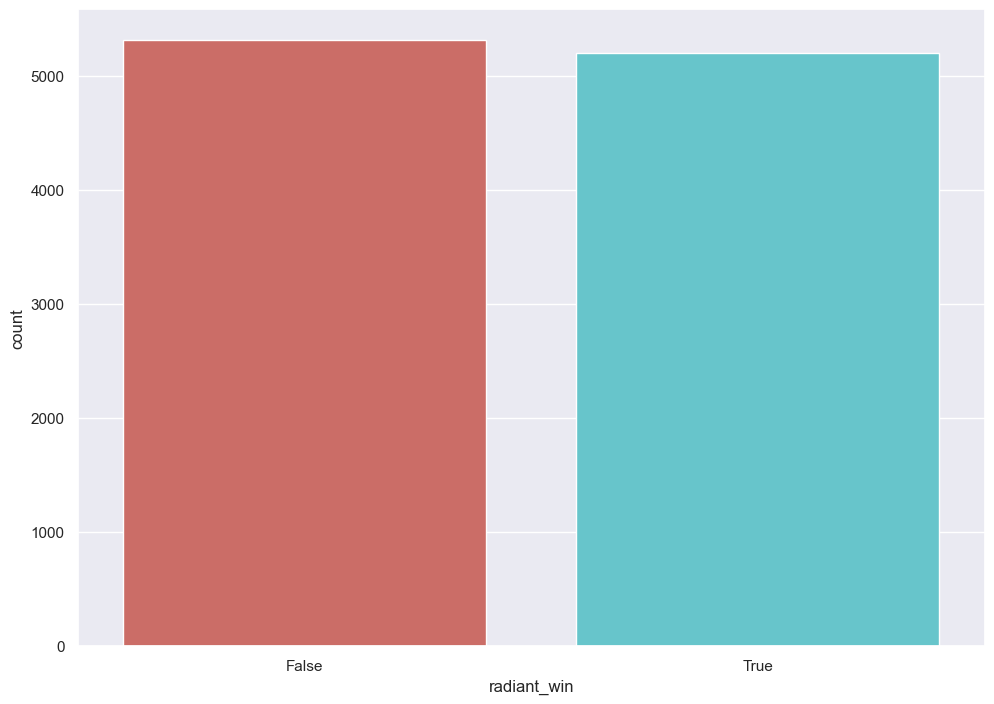

In [24]:
sns.countplot(x='radiant_win', palette='hls', data = dota_df_subset_cleaned)
plt.show()

In [25]:
dota_df_subset_cleaned.groupby('radiant_win').mean()

,radiant_denies,radiant_cosmetics,radiant_camps_stacked,radiant_consumables,radiant_ability_used,radiant_portal_used,radiant_fruit_plucked,dire_denies,dire_cosmetics,dire_camps_stacked,...,radiant_aegis,dire_aegis,radiant_chat,last_hit_difference,obs_difference,sent_difference,rune_difference,lamp_difference,dire_chat,avg_adv
radiant_win,,,,,,,,,,,,,,,,,,,,,
False,33.424032,11.039300,6.472546,30.438511,780.708349,2.270590,3.542309,37.692366,11.216059,7.846183,...,0.330951,1.021625,34.440203,-82.995487,-0.199699,-0.290335,-8.521249,0.489846,27.380030,-659.723076
True,37.542099,11.262784,7.289504,33.085544,852.328527,3.586697,4.388120,33.090927,11.202422,7.149942,...,1.108804,0.301230,28.155709,60.483083,0.230873,0.297578,2.668589,0.859477,34.976547,705.129549


### Box and swarm plot to see if early advantage corresponds to win/lose

C:\anaconda3\envs\huggingface\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\envs\huggingface\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\envs\huggingface\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\envs\huggingface\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


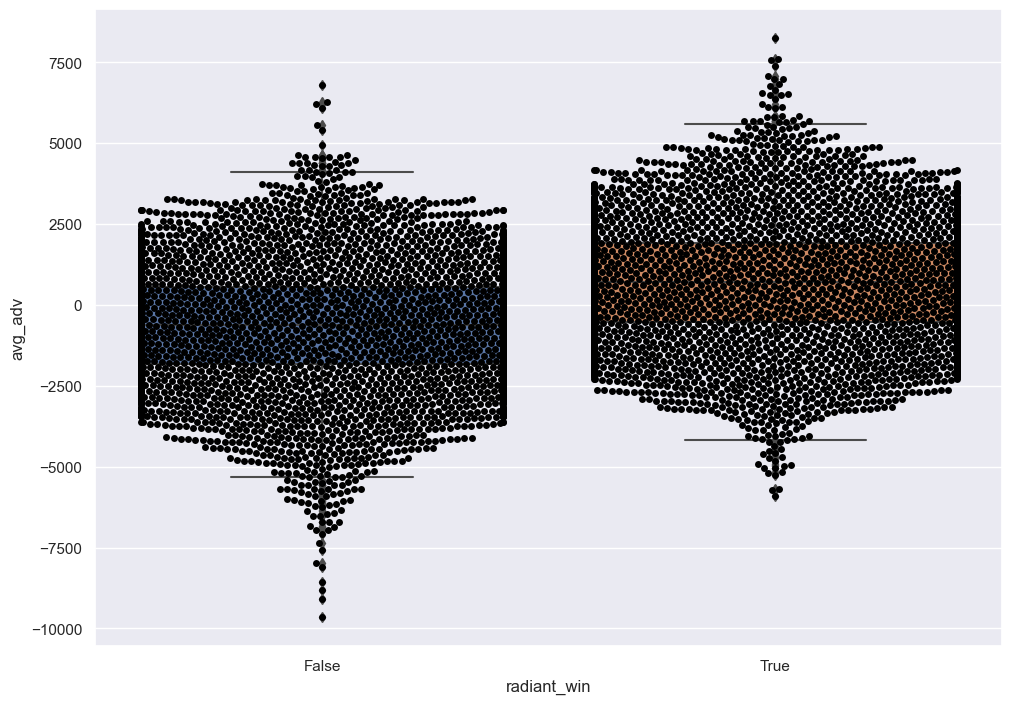

In [26]:
sns.boxplot( y="avg_adv", x='radiant_win', data=dota_df_subset_cleaned, )
sns.swarmplot( y="avg_adv", x='radiant_win', data=dota_df_subset_cleaned, color='black')
plt.show()

# Modelling variables

## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [28]:
data_x = dota_df_subset_cleaned.drop('radiant_win', axis='columns')
data_y = dota_df_subset_cleaned['radiant_win']

In [29]:
data_x.columns

Index(['radiant_denies', 'radiant_cosmetics', 'radiant_camps_stacked',
       'radiant_consumables', 'radiant_ability_used', 'radiant_portal_used',
       'radiant_fruit_plucked', 'dire_denies', 'dire_cosmetics',
       'dire_camps_stacked', 'dire_consumables', 'dire_ability_used',
       'dire_portal_used', 'dire_fruit_plucked', 'radiant_kill_courier',
       'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat',
       'last_hit_difference', 'obs_difference', 'sent_difference',
       'rune_difference', 'lamp_difference', 'dire_chat', 'avg_adv'],
      dtype='object')

### Feature selection
#### Recursive Feature Elimination to choose variables
RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

In [30]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select= 1)
rfe = rfe.fit(data_x, data_y)
print(rfe.support_)
print(rfe.ranking_)

C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False]
[22 23 17  8 25 11  7 18 15 16  9 24 10 13 19  5  1  2 20 12  3 21  4  6
 14 26]


In [31]:
df_important = pd.DataFrame()
df_important['variable'] = data_x.columns.values
df_important['rank'] = rfe.ranking_
df_important.sort_values(by= ['rank'])

,variable,rank
16,radiant_aegis,1
17,dire_aegis,2
20,obs_difference,3
22,rune_difference,4
15,dire_kill_courier,5
23,lamp_difference,6
6,radiant_fruit_plucked,7
3,radiant_consumables,8
10,dire_consumables,9
12,dire_portal_used,10


Ranking of importance for each variable.

A hyper parameter of 20 is chosen for features to select

In [32]:
rfe = RFE(logreg, n_features_to_select= 20)
rfe = rfe.fit(data_x, data_y)
print(rfe.support_)
print(rfe.ranking_)

C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[False False  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True False  True  True
  True False]
[3 4 1 1 6 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 2 1 1 1 7]


C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
df_important = pd.DataFrame()
df_important['variable'] = data_x.columns.values
df_important['rank'] = rfe.ranking_
df_important.sort_values(by= ['rank'])

,variable,rank
12,dire_portal_used,1
18,radiant_chat,1
17,dire_aegis,1
16,radiant_aegis,1
15,dire_kill_courier,1
14,radiant_kill_courier,1
13,dire_fruit_plucked,1
24,dire_chat,1
19,last_hit_difference,1
10,dire_consumables,1


### Using all 26 vairables 

Instead of using just RFE, we combine it with looking at the p values of the logistic model. The p value determines how statistically significant the coefficients of the variables of from zero. A high p value means that the variable may not be very useful in predicting the outcome variable

In [34]:
import statsmodels.api as sm
logit_model=sm.Logit(data_y,data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.379616
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE      
Dependent Variable:   radiant_win        Pseudo R-squared:   0.452    
Date:                 2023-11-12 11:56   AIC:                8039.1112
No. Observations:     10520              BIC:                8227.8981
Df Model:             25                 Log-Likelihood:     -3993.6  
Df Residuals:         10494              LL-Null:            -7291.3  
Converged:            1.0000             LLR p-value:        0.0000   
No. Iterations:       7.0000             Scale:              1.0000   
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
radiant_denies         0.0016   0.0022   0.7189 0.4722 -0.0027  0.0058
rad

The least important variables from RFE are sent_difference, radiant_denies, radiant_cosmetics, dire_ability_used, radiant_ability_used and avg_adv. By looking at the p values, we see that all except radiant_ability_used and dire_ability_used are shown to have p values of more than 0.05. This means that there is no significant evidence to show that the coefficients of these variables are significantly different from 0. 

We can also remove radiant_camps_stacked, radiant_portal_used, dire_cosemetics, dire_portal_used, dire_fruit_plucked, radiant_kill_courier.

The final chosen variables by looking at the p value are radiant_consumables, radiant_ability_used, radiant_fruit_plucked, dire_denies,dire_camps_stacked, dire_consumables, dire_ability_used, dire_kill_courier, radiant_aegis, dire_aegis, radiant_chat, last_hit_difference, obs_difference, rune_difference, lamp_difference, dire_chat.

However we first try the model with all variables

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix_print = confusion_matrix(y_test, y_pred)
print(confusion_matrix_print)

[[1322  363]
 [ 331 1140]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.78      0.79      1685
        True       0.76      0.77      0.77      1471

    accuracy                           0.78      3156
   macro avg       0.78      0.78      0.78      3156
weighted avg       0.78      0.78      0.78      3156



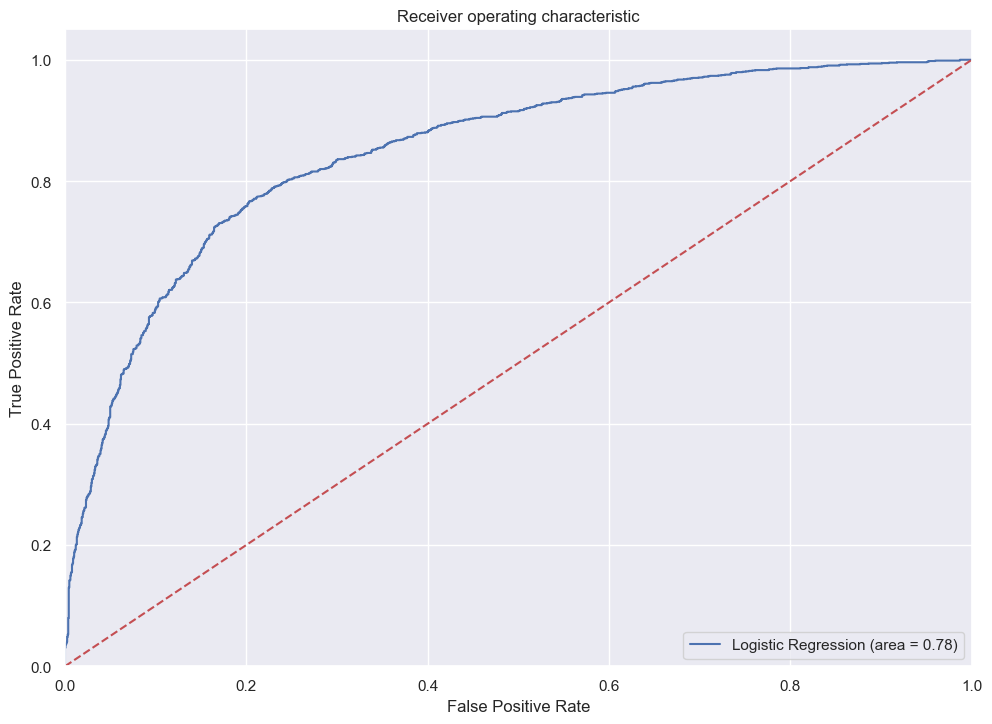

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Use varaibles chosen by RFE and p value
Next, we try the model with our feature selection

In [40]:
data_x_var = data_x[['radiant_consumables', 'radiant_ability_used', 'radiant_fruit_plucked', 'dire_denies','dire_camps_stacked', 'dire_consumables', 'dire_ability_used', 'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat', 'last_hit_difference', 'obs_difference', 'rune_difference', 'lamp_difference', 'dire_chat']]

# sent_difference
# radiant_denies
# radiant_cosmetics
# dire_ability_used
# radiant_ability_used
# avg_adv

In [41]:
data_x_var

,radiant_consumables,radiant_ability_used,radiant_fruit_plucked,dire_denies,dire_camps_stacked,dire_consumables,dire_ability_used,dire_kill_courier,radiant_aegis,dire_aegis,radiant_chat,last_hit_difference,obs_difference,rune_difference,lamp_difference,dire_chat
0,33,597,0,30,8,47,741,1,0,1,28,-236,0,-21,0,19
1,16,402,0,40,1,20,350,3,0,1,23,-135,1,-28,0,21
2,32,1019,2,31,18,34,582,2,0,1,66,-254,-2,-5,11,35
3,26,594,7,24,8,31,630,2,0,0,18,-74,-1,-10,4,3
4,21,533,7,32,1,22,411,1,0,0,13,-48,-1,-18,-2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10515,46,774,0,31,7,25,1213,4,1,1,65,-183,1,-6,0,32
10516,29,521,8,27,14,35,818,0,2,0,32,101,-2,-2,-11,34
10517,35,529,0,29,3,23,397,0,1,0,47,100,-1,1,0,18
10518,20,541,0,54,8,27,781,0,1,0,26,-233,0,-11,0,9


In [42]:
logit_model=sm.Logit(data_y,data_x_var)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.380109
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE      
Dependent Variable:   radiant_win        Pseudo R-squared:   0.452    
Date:                 2023-11-12 11:56   AIC:                8029.5037
No. Observations:     10520              BIC:                8145.6802
Df Model:             15                 Log-Likelihood:     -3998.8  
Df Residuals:         10504              LL-Null:            -7291.3  
Converged:            1.0000             LLR p-value:        0.0000   
No. Iterations:       7.0000             Scale:              1.0000   
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
radiant_consumables    0.0233   0.0029   7.9929 0.0000  0.0176  0.0290
rad

### Notes

For logistic regression, the fitted line is the log odds of an event happening. In other words, 

$$ log(odds) = intercept + \textbf{wX}$$
$$odds = e^{intercept + \textbf{wX}} \\ = e^{intercept}e^{\textbf{wX}} $$

All 16 variables are shown to have p values smaller than 0.05. This means that the coeffcients of the variables are significantly different from 0 at 95% level of significance. 

The coefficients mean that with every increase in the variable, the log odds of radiant winning will increase by that number. 

For a positive example, radiant_consumables have a coefficient of 0.0233. This means that with every unit increase in radiant_consumables, the log odds of radiant_win increases by 0.0233. This also means that the odds of radiant_win is e^0.0233 (1.024) times more. 

For a negative example, dire_denies have a coefficient of -0.0043. This means that with every unit increase in dire_denies, the log odds of radiant_win decreases by 0.0043. This also means that the odds of radiant_win is e^-0.043 (0.996) times less. 

Pseudo R-squared is 0.452, which means that the chosen variables can explain about 0.452 of the variance of the target variable, radient_win

In [43]:
#Using the same train_test

X_train_var = X_train[['radiant_consumables', 'radiant_ability_used', 'radiant_fruit_plucked', 'dire_denies','dire_camps_stacked', 'dire_consumables', 'dire_ability_used', 'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat', 'last_hit_difference', 'obs_difference', 'rune_difference', 'lamp_difference', 'dire_chat']]
X_test_var = X_test[['radiant_consumables', 'radiant_ability_used', 'radiant_fruit_plucked', 'dire_denies','dire_camps_stacked', 'dire_consumables', 'dire_ability_used', 'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat', 'last_hit_difference', 'obs_difference', 'rune_difference', 'lamp_difference', 'dire_chat']]
logreg_var = LogisticRegression()
logreg_var.fit(X_train_var, y_train)

C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
y_pred = logreg_var.predict(X_test_var)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg_var.score(X_train_var, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_var.score(X_test_var, y_test)))

Accuracy of logistic regression classifier on train set: 0.78
Accuracy of logistic regression classifier on test set: 0.79


In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix_print = confusion_matrix(y_test, y_pred)
print(confusion_matrix_print)

[[1354  331]
 [ 335 1136]]


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.80      0.80      1685
        True       0.77      0.77      0.77      1471

    accuracy                           0.79      3156
   macro avg       0.79      0.79      0.79      3156
weighted avg       0.79      0.79      0.79      3156



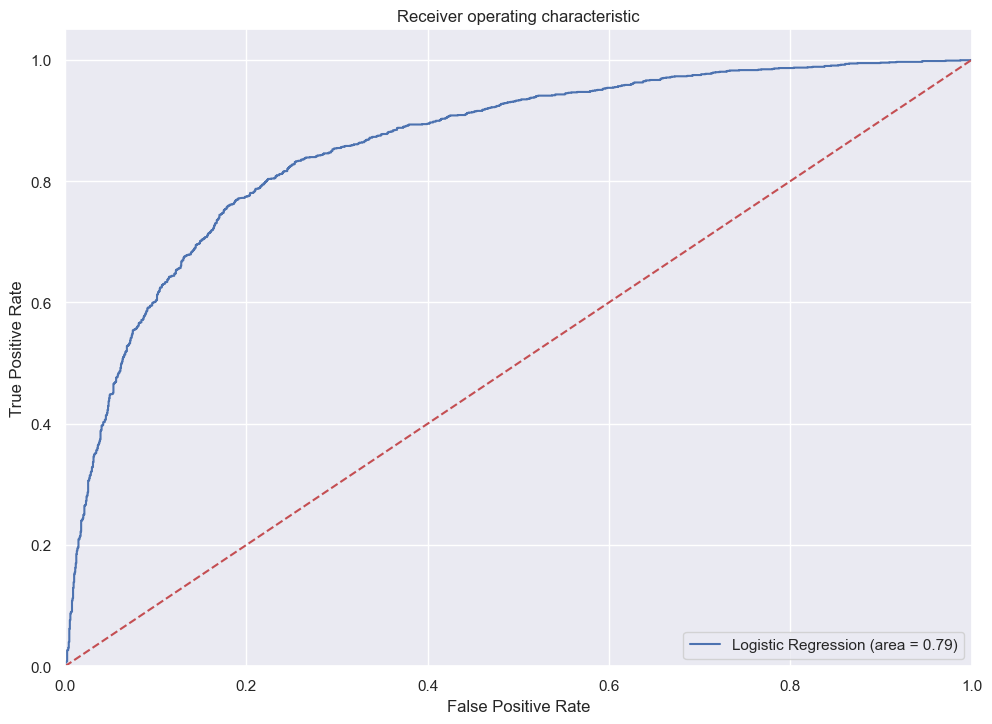

In [47]:
logit_roc_auc = roc_auc_score(y_test, logreg_var.predict(X_test_var))
fpr, tpr, thresholds = roc_curve(y_test, logreg_var.predict_proba(X_test_var)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

With feature selection, the model performs better on test data

## Regularization

l2 regularization is applied by default. Can try l1, none and elasticnet

In [85]:
logreg_var_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_var_l1.fit(X_train_var, y_train)
y_pred_l1 = logreg_var_l1.predict(X_test_var)
print('Accuracy of logistic regression classifier with l1 regularizer on train set: {:.2f}'.format(logreg_var_l1.score(X_train_var, y_train)))
print('Accuracy of logistic regression classifier with l1 regularizer on test set: {:.2f}'.format(logreg_var_l1.score(X_test_var, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_l1)
print(confusion_matrix_print)

Accuracy of logistic regression classifier with l1 regularizer on train set: 0.84
Accuracy of logistic regression classifier with l1 regularizer on test set: 0.84
[[1415  270]
 [ 221 1250]]


In [86]:
logreg_var_none = LogisticRegression(penalty=None)
logreg_var_none.fit(X_train_var, y_train)
y_pred_none = logreg_var_none.predict(X_test_var)
print('Accuracy of logistic regression classifier with no regularizer on train set: {:.2f}'.format(logreg_var_none.score(X_train_var, y_train)))
print('Accuracy of logistic regression classifier with no regularizer on test set: {:.2f}'.format(logreg_var_none.score(X_test_var, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_none)
print(confusion_matrix_print)

Accuracy of logistic regression classifier with no regularizer on train set: 0.78
Accuracy of logistic regression classifier with no regularizer on test set: 0.78
[[1342  343]
 [ 339 1132]]


C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


L1 regularizer seems to be the most accurate

In [50]:
print(classification_report(y_test, y_pred_l1))

              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1685
        True       0.82      0.85      0.84      1471

    accuracy                           0.84      3156
   macro avg       0.84      0.84      0.84      3156
weighted avg       0.85      0.84      0.84      3156



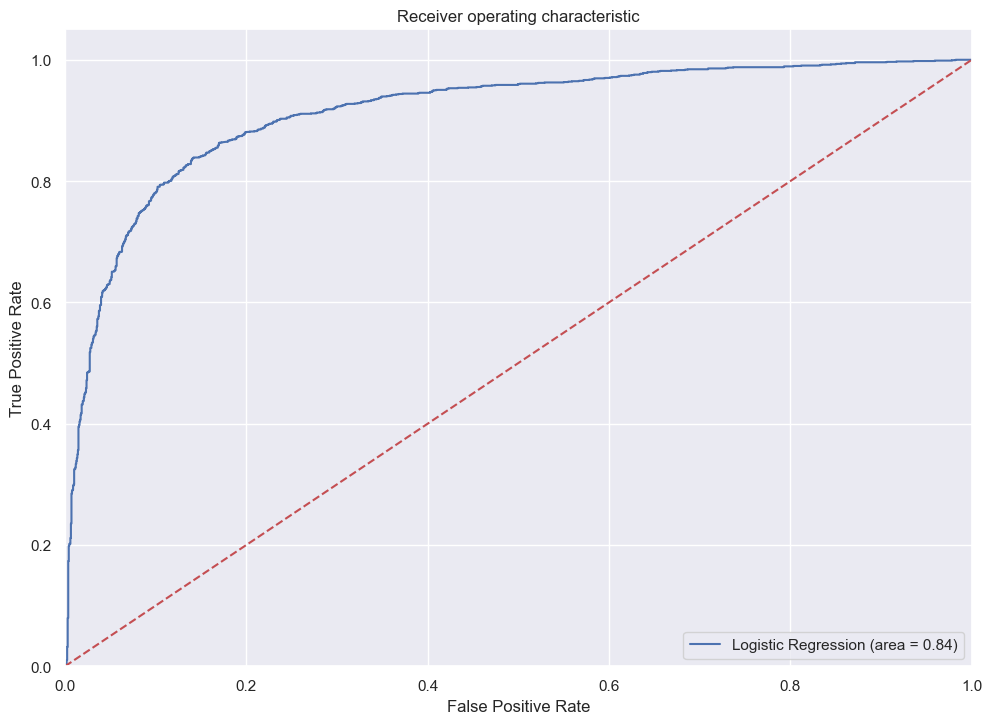

In [51]:
logit_roc_auc = roc_auc_score(y_test, logreg_var_l1.predict(X_test_var))
fpr, tpr, thresholds = roc_curve(y_test, logreg_var_l1.predict_proba(X_test_var)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Trees

In [52]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

[Text(0.5252546570816905, 0.975, 'x[16] <= 0.5\ngini = 0.5\nsamples = 7364\nvalue = [3633, 3731]'),
 Text(0.28848397455643177, 0.925, 'x[22] <= -0.5\ngini = 0.398\nsamples = 3776\nvalue = [2742, 1034]'),
 Text(0.16552245050928208, 0.875, 'x[17] <= 0.5\ngini = 0.245\nsamples = 2626\nvalue = [2250, 376]'),
 Text(0.08256324954821752, 0.825, 'x[19] <= -6.5\ngini = 0.418\nsamples = 912\nvalue = [641, 271]'),
 Text(0.04242648266798094, 0.775, 'x[4] <= 509.5\ngini = 0.271\nsamples = 618\nvalue = [518, 100]'),
 Text(0.020289140791851488, 0.725, 'x[1] <= 1.5\ngini = 0.13\nsamples = 329\nvalue = [306, 23]'),
 Text(0.007721373418761295, 0.675, 'x[20] <= -6.0\ngini = 0.274\nsamples = 110\nvalue = [92, 18]'),
 Text(0.0026285526531953343, 0.625, 'x[18] <= 4.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.0013142763265976672, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.003942828979793002, 0.575, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.012814194184327254, 0.625, 'x[2

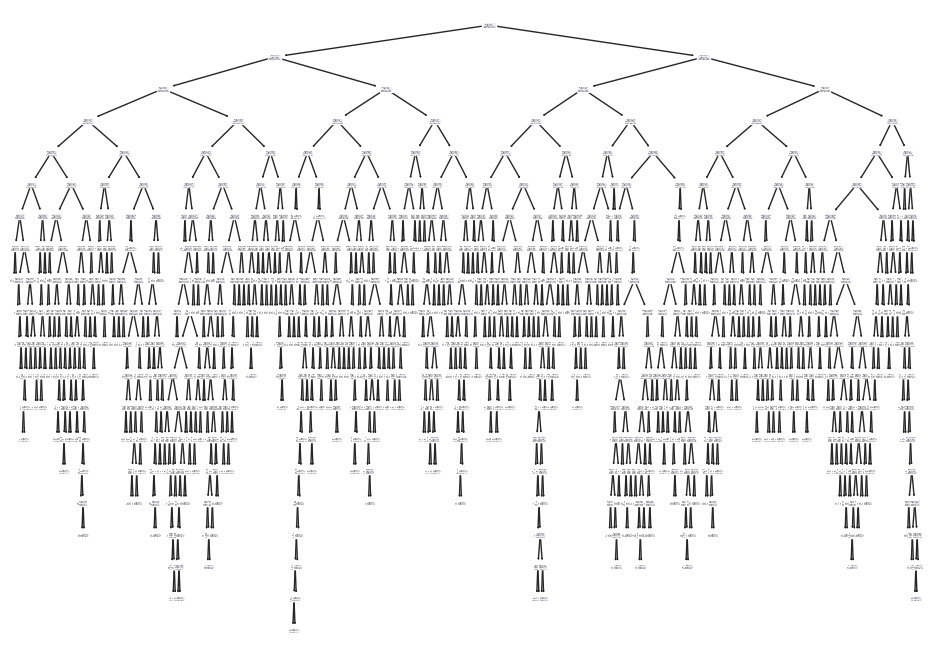

In [53]:
tree.plot_tree(clf)

In [65]:
print('Accuracy of tree classifier on train set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_tree))

Accuracy of tree classifier on train set: 1.00
Accuracy of tree classifier on test set: 0.80
[[1429  256]
 [ 220 1251]]
              precision    recall  f1-score   support

       False       0.87      0.85      0.86      1685
        True       0.83      0.85      0.84      1471

    accuracy                           0.85      3156
   macro avg       0.85      0.85      0.85      3156
weighted avg       0.85      0.85      0.85      3156



Accuracy on train set is 1, looks like there is overfitting. A single tree is prone to overfitting. Can try random  forest or adaboost

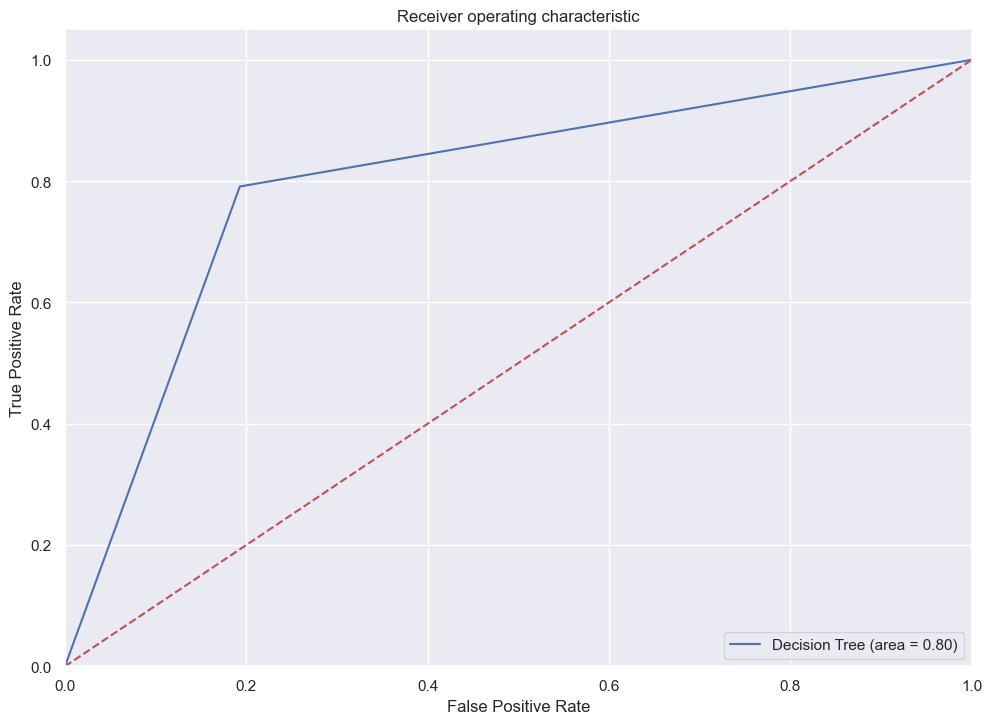

In [55]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random Forest

Step 1) Create bootstrap data, i.e select subset of all data(can select the same entry more than once)<br />
Step 2) Create a decision tree using the bootstrapped dataset, but only use a random subset of variables at each step. E.g for root node, consider only two variables and select between them.<br />
Step 3) Build multiple tree using step 1 and 2<br />
Step 4) Once we get a new data, run the data through all the trees.<br /> 

Note Bootstrapping data and using the aggregate to make a deicsion is called "Bagging"

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(max_depth=2, random_state=0)
clf_random.fit(X_train, y_train)
y_pred_tree = clf_random.predict(X_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(clf_random.score(X_train, y_train)))
print('Accuracy of Random Forest on test set: {:.2f}'.format(clf_random.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_tree))

Accuracy of Random Forest on test set: 0.82
Accuracy of Random Forest on test set: 0.83
[[1361  324]
 [ 223 1248]]
              precision    recall  f1-score   support

       False       0.86      0.81      0.83      1685
        True       0.79      0.85      0.82      1471

    accuracy                           0.83      3156
   macro avg       0.83      0.83      0.83      3156
weighted avg       0.83      0.83      0.83      3156



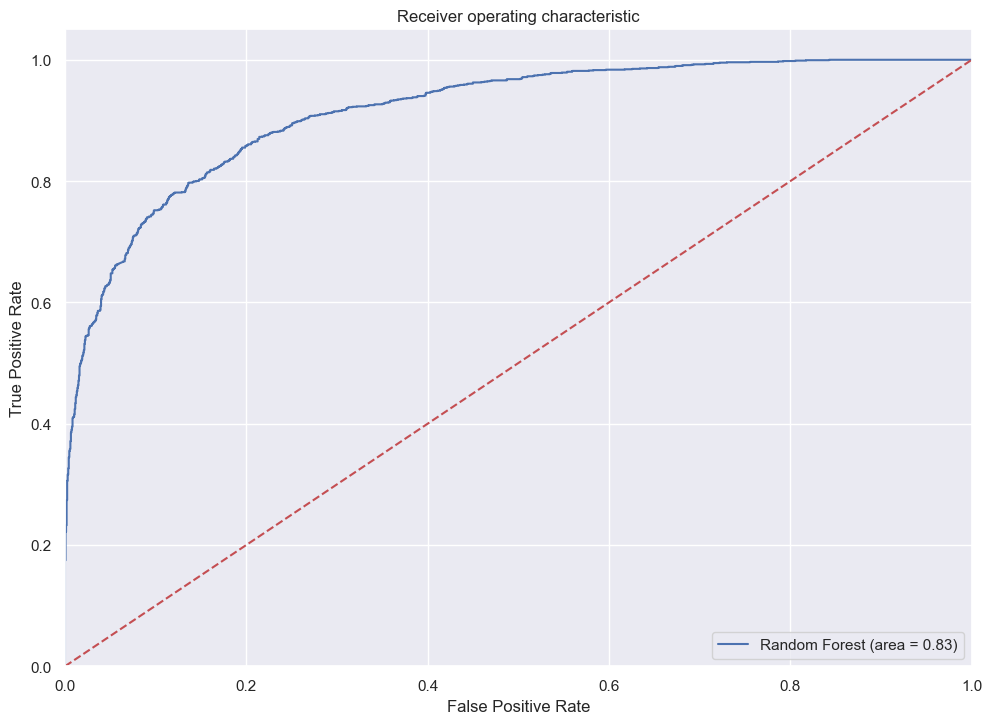

In [57]:
logit_roc_auc = roc_auc_score(y_test, clf_random.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_random.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## AdaBoost

Step 1) Create weights that are equal for each sample. <br />
Step 2) Using weighted gini index, compare best variable to classify and create a stump for the best variable chosen (Stump is a tree that has one node and two leaves)<br />
Step 3) Determine amount of say for this classifier. <br />Note: Total Error for a stump is the sum of the wieghts assosciated with the incorrectly classified samples $$\text{Amount of Say} = \frac{1}{2}log\frac{1-Total Error}{Total Error}$$ <br />
Step 4) Update sample weights. <br />Incorrectly classified samples are given this new sample weight. 
$$\text{New Sample Weight} = \text{sample weight} \times e^{\text{amount of say}}$$
Correctly classified samples are given this new sample weight. 
$$\text{New Sample Weight} = \text{sample weight} \times e^{-\text{amount of say}}$$
Step 5) Normalize new sample weights
Step 6) Create the second stump using the updated sample weights (Step 2 onwards)
Step 7) Given a new data, put the data through the forest of stumps. Combine the amount of say for both sides. The number that is bigger will be the where the data is classfied in

In [68]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state=0)
clf_ada.fit(X_train, y_train)
y_pred_tree = clf_ada.predict(X_test)
print('Accuracy of AdaBoost on train set: {:.2f}'.format(clf_ada.score(X_train, y_train)))
print('Accuracy of AdaBoost on test set: {:.2f}'.format(clf_ada.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_tree))

Accuracy of AdaBoost on train set: 0.85
Accuracy of AdaBoost on test set: 0.85
[[1429  256]
 [ 220 1251]]
              precision    recall  f1-score   support

       False       0.87      0.85      0.86      1685
        True       0.83      0.85      0.84      1471

    accuracy                           0.85      3156
   macro avg       0.85      0.85      0.85      3156
weighted avg       0.85      0.85      0.85      3156



Both adaboost and random forest can help deal with overfitting and perform better on test set.

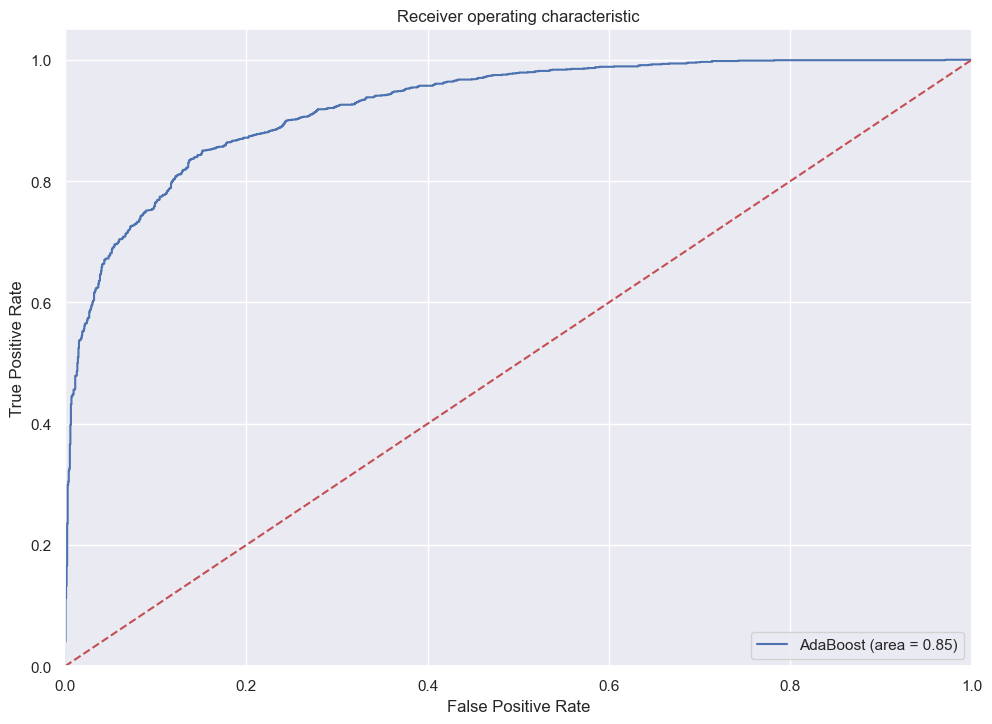

In [69]:
logit_roc_auc = roc_auc_score(y_test, clf_ada.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_ada.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

In [73]:
clf_ada.feature_importances_

array([0.  , 0.02, 0.  , 0.06, 0.12, 0.02, 0.  , 0.02, 0.  , 0.  , 0.06,
       0.12, 0.  , 0.  , 0.  , 0.02, 0.04, 0.04, 0.04, 0.14, 0.04, 0.02,
       0.08, 0.06, 0.06, 0.04])

In [83]:
pd.DataFrame(data = {'name':X_train.columns, 'importance':clf_ada.feature_importances_}).sort_values('importance', ascending = False)

,name,importance
19,last_hit_difference,0.14
11,dire_ability_used,0.12
4,radiant_ability_used,0.12
22,rune_difference,0.08
24,dire_chat,0.06
3,radiant_consumables,0.06
23,lamp_difference,0.06
10,dire_consumables,0.06
25,avg_adv,0.04
16,radiant_aegis,0.04


Using AdaBoost, we see that avg_adv is 9th importnace in splitting the decision tree. This indicates that there are many other variables that impact who wins the game much more than having a good start.

# Neural Network

In [70]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1, max_iter = 1000)
clf_nn.fit(X_train, y_train)
y_pred_nn = clf_nn.predict(X_test)
print('Accuracy of Neural Network on train set: {:.2f}'.format(clf_nn.score(X_train, y_train)))
print('Accuracy of Neural Network on test set: {:.2f}'.format(clf_nn.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_nn)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_nn))

Accuracy of Neural Network on train set: 0.79
Accuracy of Neural Network on test set: 0.78
[[1324  361]
 [ 335 1136]]
              precision    recall  f1-score   support

       False       0.80      0.79      0.79      1685
        True       0.76      0.77      0.77      1471

    accuracy                           0.78      3156
   macro avg       0.78      0.78      0.78      3156
weighted avg       0.78      0.78      0.78      3156



C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


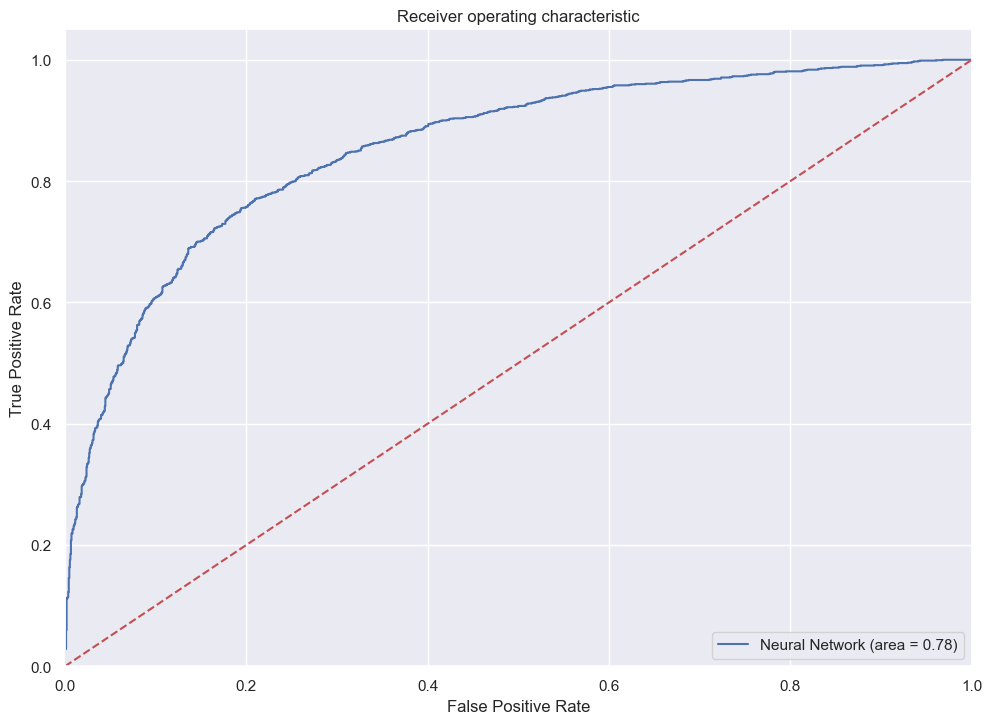

In [71]:
logit_roc_auc = roc_auc_score(y_test, clf_nn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_nn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

# SVM

In [72]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print('Accuracy of SVM on test set: {:.2f}'.format(clf_svm.score(X_train, y_train)))
print('Accuracy of SVM on test set: {:.2f}'.format(clf_svm.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_svm)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_svm))

Accuracy of SVM on test set: 0.71
Accuracy of SVM on test set: 0.71
[[1196  489]
 [ 418 1053]]
              precision    recall  f1-score   support

       False       0.74      0.71      0.73      1685
        True       0.68      0.72      0.70      1471

    accuracy                           0.71      3156
   macro avg       0.71      0.71      0.71      3156
weighted avg       0.71      0.71      0.71      3156



In [90]:
df_compare = pd.DataFrame(data = {
    
    'model_name' :[
        'Logistic Regression L2', 'Logistic Regression L1', 'Logistic Regression', 'Decision Tree', 'Random Forest',
        'AdaBoost', 'Neural Network', "SVM"
    ],
    'accuracy':[
        logreg_var.score(X_test_var, y_test),
        logreg_var_l1.score(X_test_var, y_test),
        logreg_var_none.score(X_test_var, y_test),
        clf.score(X_test, y_test),
        clf_random.score(X_test, y_test),
        clf_ada.score(X_test, y_test),
        clf_nn.score(X_test, y_test),
        clf_svm.score(X_test, y_test)
    ]
})
df_compare

,model_name,accuracy
0,Logistic Regression L2,0.788973
1,Logistic Regression L1,0.844423
2,Logistic Regression,0.783904
3,Decision Tree,0.799747
4,Random Forest,0.826679
5,AdaBoost,0.849176
6,Neural Network,0.779468
7,SVM,0.712611


# Conclusion

AdaBoost has the highest accuracy. In both Logistic Regression and AdaBoost, we see that **avg_adv** is not in the top 5 most important variables. This means that having a bad start would not automatically result in a lost. Players should still focus on other more important objectives such as last hits, roshan, runes, purchasing consumables. Similarly, a team that has the advantage early cannot get complacent, for they may have won the battle, but can still lose the war